In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from scipy.spatial.distance import cosine, euclidean
import matplotlib.pyplot as plt
from datetime import datetime
import dlib  # Para la detección de puntos faciales


In [ ]:
# Configuración
IMG_SIZE = 224  # Tamaño de entrada para MobileNetV2
DETECTION_CONFIDENCE = 0.7  # Umbral de confianza para la detección
SIMILARITY_THRESHOLD = 0.65  # Umbral para considerar que es el mismo perro
COLOR_THRESHOLD_BLACK = 60  # Umbral para clasificar un píxel como negro
COLOR_THRESHOLD_WHITE = 200  # Umbral para clasificar un píxel como blanco
LANDMARK_SIMILARITY_THRESHOLD = 0.8  # Umbral para similitud de landmarks

/tmp/ipython-input-4110659359.py:624: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  print(f"Fecha y hora actual (UTC): {datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')}")


Fecha y hora actual (UTC): 2025-08-23 00:20:53
Usuario actual: ButterBug404

Demostración de reconocimiento facial avanzado para perros con análisis de puntos característicos

Prueba 1: Comparando dos imágenes del mismo perro
Simulando carga de detector de caras de perros...
Inicializando detector de puntos faciales para perros...
Detector de landmarks facial real inicializado
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


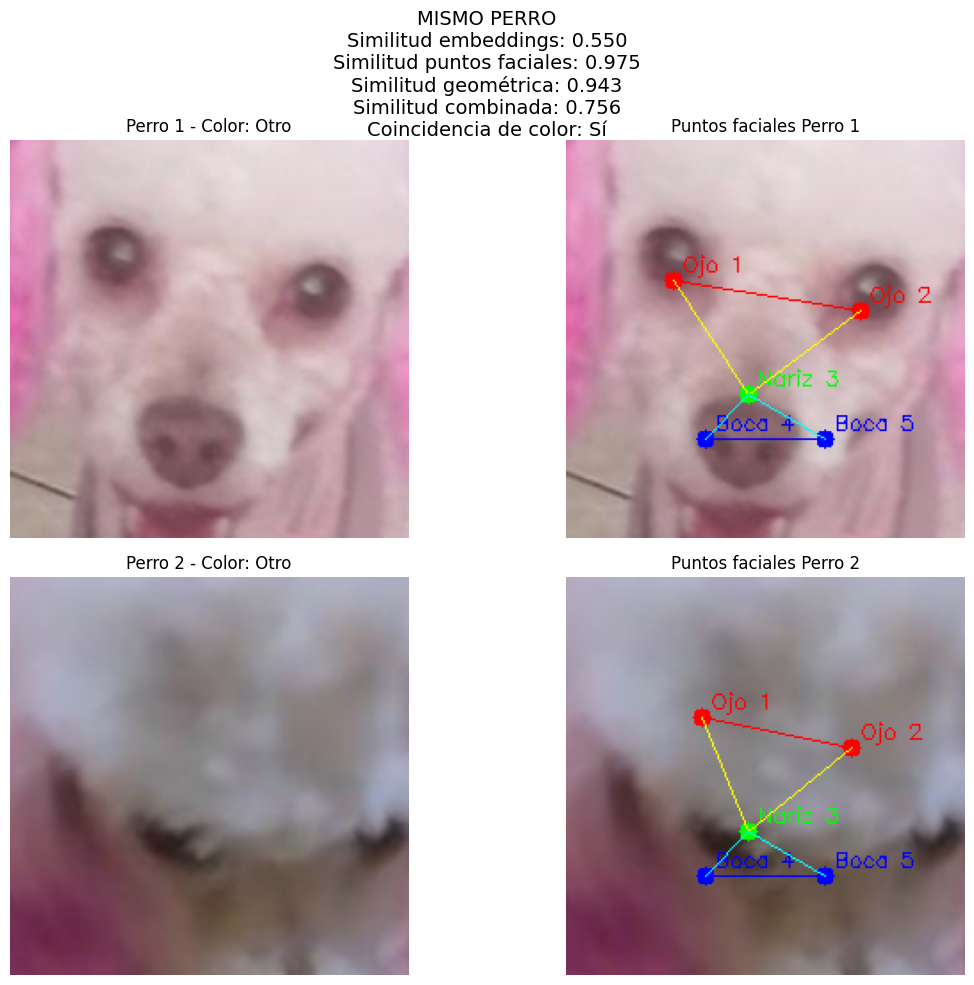


Nivel de confianza: Moderado-Alto
Interpretación: Hay una buena probabilidad de que sean el mismo perro.

Prueba 2: Comparando perros diferentes de la misma raza
Simulando carga de detector de caras de perros...
Inicializando detector de puntos faciales para perros...
Detector de landmarks facial real inicializado
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


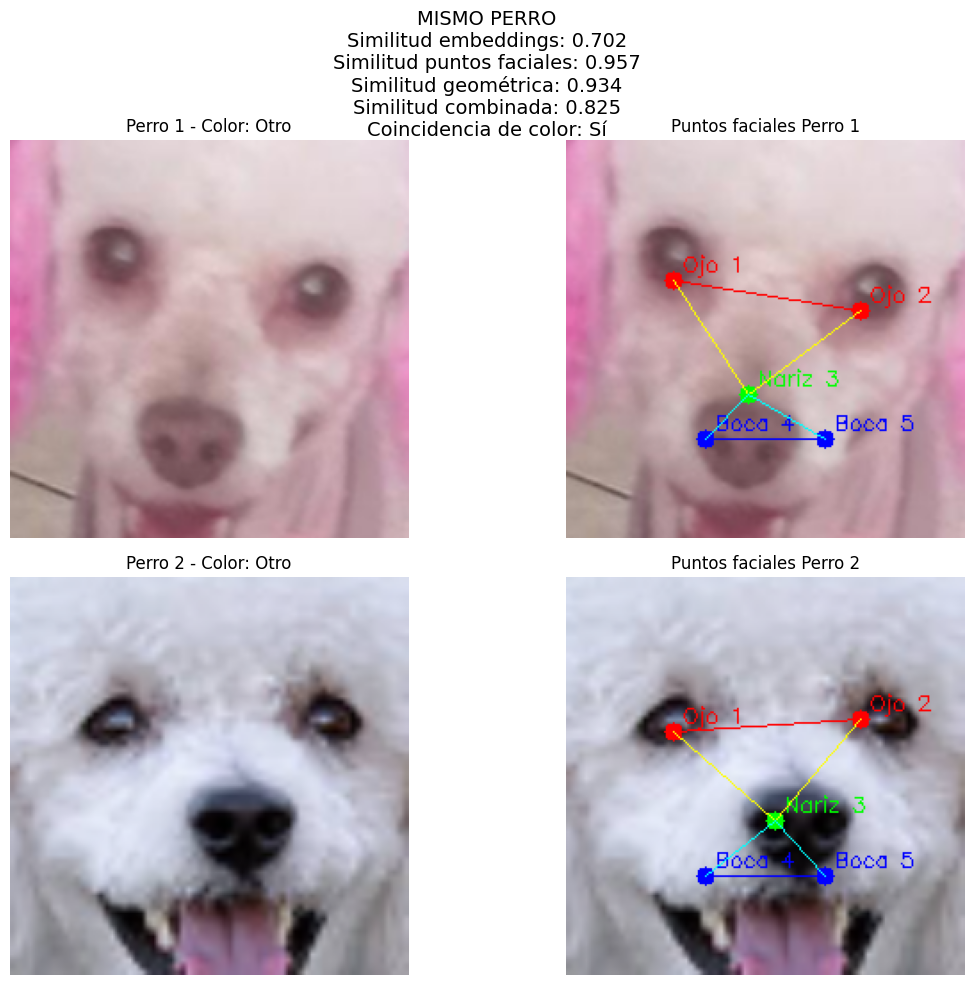


Nivel de confianza: Alto
Interpretación: Es muy probable que sean el mismo perro.


In [ ]:


class DogFacialLandmarkDetector:
    """Detector de puntos característicos faciales para perros"""

    def __init__(self):
        """Inicializa el detector de landmarks"""
        print("Inicializando detector de puntos faciales para perros...")
        # En un entorno real, cargarías un modelo pre-entrenado específico para perros
        # Como este es un ejemplo, usaremos simulación o un detector humano adaptado

        try:
            # Intentar cargar un detector de dlib (en un caso real, sería uno específico para perros)
            self.detector = dlib.get_frontal_face_detector()
            # En un caso real, usarías un predictor específico para perros
            # self.predictor = dlib.shape_predictor("dog_facial_landmarks_model.dat")
            self.is_simulation = False
            print("Detector de landmarks facial real inicializado")
        except:
            # Si no se puede cargar, usar simulación
            self.is_simulation = True
            print("Usando simulación para landmarks faciales de perros")

    def detect_landmarks(self, image):
        """Detecta puntos característicos en la cara de un perro"""
        if not self.is_simulation:
            # Implementación real con dlib (adaptaríamos para perros)
            # En un sistema real, esto sería reemplazado por un modelo entrenado con perros
            gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
            faces = self.detector(gray)
            landmarks = []

            if len(faces) > 0:
                # En un caso real usaríamos: landmarks = self.predictor(gray, faces[0])
                # y convertiríamos los landmarks a coordenadas
                pass

        # Simulación de landmarks para ejemplo
        # Definir puntos clave: ojos, nariz y esquinas de boca
        h, w = image.shape[:2]

        # Simular detección de puntos de ojos
        left_eye_x = int(w * 0.3)
        right_eye_x = int(w * 0.7)
        eyes_y = int(h * 0.4)

        # Punto de la nariz (centro inferior)
        nose_x = int(w * 0.5)
        nose_y = int(h * 0.6)

        # Simular otros puntos faciales (esquinas de boca)
        left_mouth_x = int(w * 0.35)
        right_mouth_x = int(w * 0.65)
        mouth_y = int(h * 0.75)

        # En un caso real, estos puntos se detectarían automáticamente
        # y serían más precisos. Aquí simulamos 5 puntos clave.
        landmarks = [
            (left_eye_x, eyes_y),     # Ojo izquierdo
            (right_eye_x, eyes_y),    # Ojo derecho
            (nose_x, nose_y),         # Nariz
            (left_mouth_x, mouth_y),  # Esquina izquierda de la boca
            (right_mouth_x, mouth_y)  # Esquina derecha de la boca
        ]

        # Refinar los puntos buscando características visuales reales cerca de estas posiciones
        landmarks = self._refine_landmarks(image, landmarks)

        return landmarks

    def _refine_landmarks(self, image, initial_landmarks):
        """Refina la posición de los landmarks buscando características reales"""
        refined_landmarks = []
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        for x, y in initial_landmarks:
            # Definir una pequeña región alrededor del punto inicial
            roi_size = 10
            x_start = max(0, x - roi_size)
            y_start = max(0, y - roi_size)
            x_end = min(image.shape[1], x + roi_size)
            y_end = min(image.shape[0], y + roi_size)

            # Extraer región de interés
            roi = gray[y_start:y_end, x_start:x_end]

            if roi.size == 0:
                # Si la ROI está fuera de los límites, usar coordenadas originales
                refined_landmarks.append((x, y))
                continue

            # Encontrar el punto de mayor "interés" en la región
            # Para ojos y nariz, buscamos áreas oscuras (valores bajos)
            min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(roi)

            # Si es un punto de ojo o nariz, usar el mínimo (más oscuro)
            # Para las esquinas de la boca, usamos el punto original
            if len(refined_landmarks) < 3:  # Primeros 3 puntos (ojos y nariz)
                # Convertir coordenadas locales a globales
                refined_x = x_start + min_loc[0]
                refined_y = y_start + min_loc[1]
                refined_landmarks.append((refined_x, refined_y))
            else:
                # Para otros puntos, mantener las coordenadas originales
                refined_landmarks.append((x, y))

        return refined_landmarks

    def draw_landmarks(self, image, landmarks):
        """Dibuja los landmarks en la imagen"""
        image_with_landmarks = image.copy()

        # Dibujar puntos
        for i, (x, y) in enumerate(landmarks):
            # Diferentes colores para diferentes tipos de puntos
            if i < 2:  # Ojos
                color = (255, 0, 0)  # Rojo para ojos
                label = "Ojo"
            elif i == 2:  # Nariz
                color = (0, 255, 0)  # Verde para nariz
                label = "Nariz"
            else:  # Boca
                color = (0, 0, 255)  # Azul para boca
                label = "Boca"

            # Dibujar círculo y etiqueta
            cv2.circle(image_with_landmarks, (x, y), 5, color, -1)
            cv2.putText(image_with_landmarks, f"{label} {i+1}", (x+5, y-5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.4, color, 1)

        # Conectar puntos con líneas para visualizar mejor
        if len(landmarks) >= 2:
            # Conectar ojos
            cv2.line(image_with_landmarks, landmarks[0], landmarks[1], (255, 0, 0), 1)

        if len(landmarks) >= 5:
            # Conectar esquinas de la boca
            cv2.line(image_with_landmarks, landmarks[3], landmarks[4], (0, 0, 255), 1)

            # Conectar triángulo central: ojos a nariz
            cv2.line(image_with_landmarks, landmarks[0], landmarks[2], (255, 255, 0), 1)
            cv2.line(image_with_landmarks, landmarks[1], landmarks[2], (255, 255, 0), 1)

            # Nariz a esquinas de boca
            cv2.line(image_with_landmarks, landmarks[2], landmarks[3], (0, 255, 255), 1)
            cv2.line(image_with_landmarks, landmarks[2], landmarks[4], (0, 255, 255), 1)

        return image_with_landmarks

    def calculate_landmark_similarity(self, landmarks1, landmarks2):
        """Calcula la similitud entre dos conjuntos de landmarks"""
        if len(landmarks1) != len(landmarks2):
            return 0.0

        # Calcular la distancia euclidiana normalizada entre landmarks correspondientes
        total_distance = 0
        max_distance = 0

        # Normalizar landmarks para hacerlos invariantes a la escala
        landmarks1_norm = self._normalize_landmarks(landmarks1)
        landmarks2_norm = self._normalize_landmarks(landmarks2)

        for p1, p2 in zip(landmarks1_norm, landmarks2_norm):
            dist = euclidean(p1, p2)
            total_distance += dist
            max_distance += 2.0  # Máxima distancia posible en coordenadas normalizadas

        # Convertir distancia a similitud (0 a 1, donde 1 es idéntico)
        if max_distance == 0:
            return 0.0

        similarity = 1.0 - (total_distance / max_distance)
        return similarity

    def _normalize_landmarks(self, landmarks):
        """Normaliza las coordenadas de landmarks a un rango [0,1]"""
        if not landmarks:
            return []

        # Encontrar los valores mínimos y máximos
        min_x = min(x for x, _ in landmarks)
        max_x = max(x for x, _ in landmarks)
        min_y = min(y for _, y in landmarks)
        max_y = max(y for _, y in landmarks)

        # Evitar división por cero
        x_range = max_x - min_x
        y_range = max_y - min_y

        if x_range == 0: x_range = 1
        if y_range == 0: y_range = 1

        # Normalizar a [0,1]
        normalized = [
            ((x - min_x) / x_range, (y - min_y) / y_range)
            for x, y in landmarks
        ]

        return normalized

    def calculate_geometric_features(self, landmarks):
        """Calcula características geométricas basadas en los landmarks"""
        if len(landmarks) < 5:
            return {}

        # Extraer puntos importantes
        left_eye = landmarks[0]
        right_eye = landmarks[1]
        nose = landmarks[2]
        left_mouth = landmarks[3]
        right_mouth = landmarks[4]

        # Calcular distancias entre puntos clave
        eye_distance = euclidean(left_eye, right_eye)
        left_eye_to_nose = euclidean(left_eye, nose)
        right_eye_to_nose = euclidean(right_eye, nose)
        nose_to_left_mouth = euclidean(nose, left_mouth)
        nose_to_right_mouth = euclidean(nose, right_mouth)
        mouth_width = euclidean(left_mouth, right_mouth)

        # Calcular ángulos
        def angle_between_points(p1, p2, p3):
            """Calcula el ángulo entre tres puntos (en radianes)"""
            a = np.array(p1)
            b = np.array(p2)
            c = np.array(p3)

            ba = a - b
            bc = c - b

            cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
            angle = np.arccos(np.clip(cosine_angle, -1.0, 1.0))
            return angle

        # Ángulo entre ojos y nariz
        eye_nose_angle = angle_between_points(left_eye, nose, right_eye)

        # Ángulo entre nariz y boca
        nose_mouth_angle = angle_between_points(left_mouth, nose, right_mouth)

        # Recopilar características en un diccionario
        features = {
            'eye_distance': eye_distance,
            'left_eye_to_nose': left_eye_to_nose,
            'right_eye_to_nose': right_eye_to_nose,
            'nose_to_left_mouth': nose_to_left_mouth,
            'nose_to_right_mouth': nose_to_right_mouth,
            'mouth_width': mouth_width,
            'eye_nose_angle': eye_nose_angle,
            'nose_mouth_angle': nose_mouth_angle
        }

        return features

    def compare_geometric_features(self, features1, features2):
        """Compara las características geométricas entre dos conjuntos de landmarks"""
        if not features1 or not features2:
            return 0.0

        # Lista de pesos para cada característica (puedes ajustar estos valores)
        feature_weights = {
            'eye_distance': 1.0,
            'left_eye_to_nose': 1.0,
            'right_eye_to_nose': 1.0,
            'nose_to_left_mouth': 0.8,
            'nose_to_right_mouth': 0.8,
            'mouth_width': 0.7,
            'eye_nose_angle': 1.5,  # Los ángulos son más distintivos
            'nose_mouth_angle': 1.2
        }

        # Normalizar cada característica y calcular la diferencia ponderada
        total_diff = 0
        total_weight = 0

        for feature, weight in feature_weights.items():
            if feature in features1 and feature in features2:
                # Para ángulos, usamos diferencia circular
                if 'angle' in feature:
                    diff = abs(features1[feature] - features2[feature])
                    diff = min(diff, 2 * np.pi - diff) / np.pi  # Normalizar a [0,1]
                else:
                    # Para distancias, usamos diferencia relativa
                    max_val = max(features1[feature], features2[feature])
                    min_val = min(features1[feature], features2[feature])
                    diff = 0 if max_val == 0 else (max_val - min_val) / max_val

                total_diff += diff * weight
                total_weight += weight

        if total_weight == 0:
            return 0.0

        # Convertir diferencia a similitud
        avg_diff = total_diff / total_weight
        similarity = 1.0 - avg_diff

        return similarity

def build_embedding_model():
    """Construye un modelo para extraer características de caras de perros"""
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))

    for layer in base_model.layers:
        layer.trainable = False

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128)(x)

    model = Model(inputs=base_model.input, outputs=x)
    return model

def load_dog_face_detector():
    """Carga un detector de caras de perros usando un modelo pre-entrenado"""
    print("Simulando carga de detector de caras de perros...")

    def detect_dog_face(image):
        h, w = image.shape[:2]
        x = w // 4
        y = h // 4
        width = w // 2
        height = h // 2
        confidence = 0.95

        return [(x, y, x + width, y + height, confidence)]

    return detect_dog_face

def preprocess_image(image_path):
    """Carga y preprocesa una imagen para el modelo"""
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError(f"No se pudo cargar la imagen: {image_path}")

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def extract_dog_face(image, detector):
    """Extrae la región de la cara del perro de la imagen"""
    detections = detector(image)

    valid_detections = [d for d in detections if d[4] >= DETECTION_CONFIDENCE]

    if not valid_detections:
        print("No se detectó cara de perro con suficiente confianza")
        return cv2.resize(image, (IMG_SIZE, IMG_SIZE))

    best_detection = max(valid_detections, key=lambda x: x[4])
    x1, y1, x2, y2, _ = best_detection

    face_img = image[y1:y2, x1:x2]
    face_img = cv2.resize(face_img, (IMG_SIZE, IMG_SIZE))
    return face_img

def get_embedding(face_img, model):
    """Obtiene el embedding de una imagen de cara de perro"""
    if face_img.shape != (IMG_SIZE, IMG_SIZE, 3):
        face_img = cv2.resize(face_img, (IMG_SIZE, IMG_SIZE))

    img_array = np.expand_dims(face_img, axis=0).astype('float32')
    img_array = img_array / 127.5 - 1  # Normalizar a [-1, 1]

    embedding = model.predict(img_array)[0]
    embedding = embedding / np.linalg.norm(embedding)
    return embedding

def detect_dog_color(face_img):
    """Detecta si el pelaje del perro es principalmente negro, blanco o de otro color"""
    # Convertir a escala de grises
    gray = cv2.cvtColor(face_img, cv2.COLOR_RGB2GRAY)

    # Crear una máscara para eliminar el fondo
    h, w = gray.shape
    center_y, center_x = h // 2, w // 2
    radius = min(h, w) // 3

    mask = np.zeros_like(gray)
    cv2.circle(mask, (center_x, center_y), radius, 255, -1)

    # Aplicar la máscara
    masked_gray = cv2.bitwise_and(gray, gray, mask=mask)

    # Contar píxeles dentro de la máscara
    total_pixels = np.count_nonzero(mask)

    # Contar píxeles negros (valores bajos)
    black_pixels = np.sum((masked_gray < COLOR_THRESHOLD_BLACK) & (mask > 0))

    # Contar píxeles blancos (valores altos)
    white_pixels = np.sum((masked_gray > COLOR_THRESHOLD_WHITE) & (mask > 0))

    # Calcular porcentajes
    black_percentage = (black_pixels / total_pixels) * 100
    white_percentage = (white_pixels / total_pixels) * 100
    other_percentage = 100 - black_percentage - white_percentage

    # Determinar el color predominante
    color_percentages = {
        'Negro': black_percentage,
        'Blanco': white_percentage,
        'Otro': other_percentage
    }

    predominant_color = max(color_percentages, key=color_percentages.get)

    # Crear visualización del análisis de color
    color_info = {
        'predominant': predominant_color,
        'percentages': color_percentages
    }

    return color_info

def create_test_variants(face_img):
    """Crea ligeras variaciones de la imagen para pruebas robustas"""
    variants = [face_img]  # La original siempre se incluye

    # Ligeras rotaciones
    for angle in [-5, 5]:
        h, w = face_img.shape[:2]
        M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1.0)
        rotated = cv2.warpAffine(face_img, M, (w, h))
        variants.append(rotated)

    # Ligeros cambios de brillo
    for factor in [0.9, 1.1]:
        brightened = cv2.convertScaleAbs(face_img, alpha=factor, beta=0)
        variants.append(brightened)

    return variants

def compare_dog_faces(img1_path, img2_path):
    """Compara dos imágenes de perros con análisis facial avanzado"""
    # Cargar detector y modelo
    detector = load_dog_face_detector()
    embedding_model = build_embedding_model()
    landmark_detector = DogFacialLandmarkDetector()

    # Preprocesar imágenes
    img1 = preprocess_image(img1_path)
    img2 = preprocess_image(img2_path)

    # Extraer caras
    face1 = extract_dog_face(img1, detector)
    face2 = extract_dog_face(img2, detector)

    # Detectar landmarks faciales
    landmarks1 = landmark_detector.detect_landmarks(face1)
    landmarks2 = landmark_detector.detect_landmarks(face2)

    # Calcular características geométricas basadas en landmarks
    geometric_features1 = landmark_detector.calculate_geometric_features(landmarks1)
    geometric_features2 = landmark_detector.calculate_geometric_features(landmarks2)

    # Calcular similitud de landmarks
    landmark_similarity = landmark_detector.calculate_landmark_similarity(landmarks1, landmarks2)

    # Calcular similitud de características geométricas
    geometric_similarity = landmark_detector.compare_geometric_features(geometric_features1, geometric_features2)

    # Crear imágenes con landmarks dibujados
    face1_with_landmarks = landmark_detector.draw_landmarks(face1, landmarks1)
    face2_with_landmarks = landmark_detector.draw_landmarks(face2, landmarks2)

    # Analizar color
    color_info1 = detect_dog_color(face1)
    color_info2 = detect_dog_color(face2)

    # Crear variantes para pruebas robustas
    face1_variants = create_test_variants(face1)
    face2_variants = create_test_variants(face2)

    # Obtener embeddings para cada variante
    embeddings1 = [get_embedding(f, embedding_model) for f in face1_variants]
    embeddings2 = [get_embedding(f, embedding_model) for f in face2_variants]

    # Calcular matriz de similitud entre todas las variantes
    similarities = []
    for emb1 in embeddings1:
        for emb2 in embeddings2:
            similarity = 1 - cosine(emb1, emb2)
            similarities.append(similarity)

    # Usar el valor de similitud máximo
    max_similarity = max(similarities)

    # Combinar todas las similitudes para una puntuación final
    # Pesos para cada componente (puedes ajustar estos valores)
    embedding_weight = 0.5
    landmark_weight = 0.3
    geometric_weight = 0.2

    combined_similarity = (
        embedding_weight * max_similarity +
        landmark_weight * landmark_similarity +
        geometric_weight * geometric_similarity
    )

    # Determinar si es el mismo perro basado en la similitud combinada
    is_same_dog = combined_similarity >= SIMILARITY_THRESHOLD

    # Verificar si los colores coinciden
    colors_match = color_info1['predominant'] == color_info2['predominant']

    # Visualizar resultados
    plt.figure(figsize=(12, 10))

    # Primera imagen y sus landmarks
    plt.subplot(2, 2, 1)
    plt.imshow(face1)
    plt.title(f"Perro 1 - Color: {color_info1['predominant']}")
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.imshow(face1_with_landmarks)
    plt.title("Puntos faciales Perro 1")
    plt.axis('off')

    # Segunda imagen y sus landmarks
    plt.subplot(2, 2, 3)
    plt.imshow(face2)
    plt.title(f"Perro 2 - Color: {color_info2['predominant']}")
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.imshow(face2_with_landmarks)
    plt.title("Puntos faciales Perro 2")
    plt.axis('off')

    # Título general con resultados
    match_status = "MISMO PERRO" if is_same_dog else "PERROS DIFERENTES"

    # Crear una tabla con todos los valores de similitud
    similarity_info = (
        f"Similitud embeddings: {max_similarity:.3f}\n"
        f"Similitud puntos faciales: {landmark_similarity:.3f}\n"
        f"Similitud geométrica: {geometric_similarity:.3f}\n"
        f"Similitud combinada: {combined_similarity:.3f}\n"
        f"Coincidencia de color: {'Sí' if colors_match else 'No'}"
    )

    plt.suptitle(f"{match_status}\n{similarity_info}", fontsize=14)

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.show()

    # Crear un diccionario con los resultados detallados
    results = {
        'is_same_dog': is_same_dog,
        'embedding_similarity': max_similarity,
        'landmark_similarity': landmark_similarity,
        'geometric_similarity': geometric_similarity,
        'combined_similarity': combined_similarity,
        'dog1_color': color_info1['predominant'],
        'dog2_color': color_info2['predominant'],
        'colors_match': colors_match,
        'landmarks1': landmarks1,
        'landmarks2': landmarks2,
        'geometric_features1': geometric_features1,
        'geometric_features2': geometric_features2
    }

    # Mostrar mensaje interpretado
    confidence_level = interpret_confidence(combined_similarity)
    print(f"\nNivel de confianza: {confidence_level['level']}")
    print(f"Interpretación: {confidence_level['interpretation']}")

    return results

def interpret_confidence(similarity):
    """Interpreta el nivel de confianza basado en la similitud"""
    if similarity >= 0.9:
        return {
            'level': "Muy alto",
            'interpretation': "Es casi seguro que son el mismo perro."
        }
    elif similarity >= 0.8:
        return {
            'level': "Alto",
            'interpretation': "Es muy probable que sean el mismo perro."
        }
    elif similarity >= 0.7:
        return {
            'level': "Moderado-Alto",
            'interpretation': "Hay una buena probabilidad de que sean el mismo perro."
        }
    elif similarity >= 0.6:
        return {
            'level': "Moderado",
            'interpretation': "Existe cierta probabilidad de que sean el mismo perro, pero no es concluyente."
        }
    elif similarity >= 0.5:
        return {
            'level': "Bajo",
            'interpretation': "Es más probable que sean perros diferentes, pero hay algunas similitudes."
        }
    else:
        return {
            'level': "Muy bajo",
            'interpretation': "Es casi seguro que son perros diferentes."
        }

# Función principal para demostración
def main():
    print(f"Fecha y hora actual (UTC): {datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"Usuario actual: ButterBug404")
    print("\nDemostración de reconocimiento facial avanzado para perros con análisis de puntos característicos")
    print("="*90)

    # Ejemplo con imágenes del mismo perro
    print("\nPrueba 1: Comparando dos imágenes del mismo perro")
    results = compare_dog_faces(
        "/content/la.png",  # Primera foto del perro 1
        "/content/lb.png"   # Segunda foto del perro 1
    )